In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

In [32]:
doil = pd.read_excel("DO.xlsx")

### Take a look at the data

In [33]:
doil.head()

,C NO,T1,T2,T3,T4,T5,A1,A2,A3,A4,A5,P1,P2,P3,P4,P5
0,C10,2.87,2.86,3.37,3.18,3.21,12651.04,8388.24,174234.49,9192.00,10775.61,2452.42,2579.06,27590.18,3685.00,4458.61
1,C11,5.39,5.34,5.65,5.29,5.33,61560.61,30826.86,161796.12,18118.62,22828.82,11304.05,7293.68,28071.02,5012.33,6239.49
2,C12,8.14,8.05,8.42,7.99,8.03,60793.44,22838.85,131224.48,15402.64,21160.80,9931.99,4913.52,19304.13,4116.83,5144.65
3,C13,11.16,11.05,11.47,10.99,11.03,45321.09,14024.42,60357.53,10451.85,14142.64,6864.07,3111.72,15545.25,2345.05,3129.82
4,C14,14.22,14.12,14.50,14.08,14.11,9241.01,8100.29,44164.46,6802.88,9692.99,4538.21,1957.58,11243.94,1543.06,2212.40


In [34]:
doil.tail()

,C NO,T1,T2,T3,T4,T5,A1,A2,A3,A4,A5,P1,P2,P3,P4,P5
16,C26,NaN,NaN,43.54,43.51,43.52,NaN,NaN,108.61,389.14,925.59,NaN,NaN,24.25,85.22,193.46
17,C27,NaN,NaN,NaN,45.39,45.40,NaN,NaN,NaN,302.58,719.92,NaN,NaN,NaN,67.89,167.33
18,C28,NaN,NaN,NaN,47.21,47.22,NaN,NaN,NaN,243.02,531.35,NaN,NaN,NaN,52.75,112.33
19,C29,NaN,NaN,NaN,48.98,48.98,NaN,NaN,NaN,198.32,418.99,NaN,NaN,NaN,43.78,86.62
20,C30,NaN,NaN,NaN,NaN,50.75,NaN,NaN,NaN,NaN,283.83,NaN,NaN,NaN,NaN,56.56


In [35]:
doil.sample(2)

,C NO,T1,T2,T3,T4,T5,A1,A2,A3,A4,A5,P1,P2,P3,P4,P5
7,C17,22.91,22.90,23.08,22.87,22.90,3901.89,750.53,22204.90,2457.85,4440.59,899.54,176.70,3760.15,583.30,1025.89
1,C11,5.39,5.34,5.65,5.29,5.33,61560.61,30826.86,161796.12,18118.62,22828.82,11304.05,7293.68,28071.02,5012.33,6239.49


In [36]:
doil.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 16 columns):
C NO    21 non-null object
T1      13 non-null float64
T2      10 non-null float64
T3      17 non-null float64
T4      20 non-null float64
T5      21 non-null float64
A1      13 non-null float64
A2      10 non-null float64
A3      17 non-null float64
A4      20 non-null float64
A5      21 non-null float64
P1      13 non-null float64
P2      10 non-null float64
P3      17 non-null float64
P4      20 non-null float64
P5      21 non-null float64
dtypes: float64(15), object(1)
memory usage: 2.7+ KB


#### Its good that we have all numerical columns except one, so that we can manipulate and analyse it well..

In [37]:
doil.shape

(21, 16)

#### So, we have 21 rows and 16 columns in the dataset

#### Lets now look at the statistical results of the dataset

In [38]:
doil.describe()

,T1,T2,T3,T4,T5,A1,A2,A3,A4,A5,P1,P2,P3,P4,P5
count,13.000000,10.00000,17.000000,20.000000,21.000000,13.000000,10.000000,17.000000,20.000000,21.000000,13.000000,10.000000,17.000000,20.000000,21.000000
mean,19.587692,15.53100,24.675882,27.887500,28.999048,16929.493846,9084.160000,39981.015294,4008.460000,5596.925714,3202.398462,2134.967000,7371.051765,1056.916000,1407.707143
std,10.745609,8.70001,12.973082,14.637831,15.103785,23054.196501,10526.916856,58477.313118,5296.645066,6603.859233,3877.420296,2422.295728,9645.965562,1513.697089,1807.325106
min,2.870000,2.86000,3.370000,3.180000,3.210000,122.410000,125.410000,108.610000,198.320000,283.830000,28.730000,31.150000,24.250000,43.780000,56.560000
25%,11.160000,8.80000,14.500000,16.352500,17.140000,840.080000,977.465000,1328.980000,591.725000,1226.220000,194.700000,225.885000,295.370000,126.457500,264.990000
50%,20.110000,15.63000,25.720000,29.385000,30.640000,7603.360000,5958.495000,12546.870000,1551.830000,2933.390000,1751.730000,1398.470000,2442.060000,328.105000,612.210000
75%,28.150000,22.19500,35.310000,40.035000,41.560000,15542.790000,12615.375000,44164.460000,5071.782500,6962.500000,4538.210000,2978.555000,11243.940000,1119.752500,1455.400000
max,35.270000,28.18000,43.540000,48.980000,50.750000,61560.610000,30826.860000,174234.490000,18118.620000,22828.820000,11304.050000,7293.680000,28071.020000,5012.330000,6239.490000


#### From the "count" row we can see that a few columns have null values, and also from the "do.info()" cell we can say this. That means we need to do something about the null values in the dataset to proceed in the analysis.
### We can also see the various results of every column up here, the mean, median, max, min, etc. which are enough to get a feel of the data.

### Missing data is a big issue in every real life data analysis project, because they can cause your insights to be way out of expectation. They have to be cleverly dealt with. It is represented as "NaN" i.e. Not a Number by Pandas Dataframe object.

In [39]:
null_df = doil.isnull().sum().to_frame() # column wise no. of null values
null_df

,0
C NO,0
T1,8
T2,11
T3,4
T4,1
T5,0
A1,8
A2,11
A3,4
A4,1


#### We see that the first and second sample of distilled oil whose GC was done, have lots of null values. The third sample also has some.

### Now, I set a constraint that if any column has more than 90 % of entries as null, then we will discard it. Lets do it in code.

In [40]:
null_df[0]/21 > 0.90  ## we have 21 entries in total, and here we check if the fraction : (No. of nulls/Total entries) is above 0.90

C NO    False
T1      False
T2      False
T3      False
T4      False
T5      False
A1      False
A2      False
A3      False
A4      False
A5      False
P1      False
P2      False
P3      False
P4      False
P5      False
Name: 0, dtype: bool

### All are False, i.e. no column to be discarded in the analysis. 

## Thus, we now do what is technically called -  Data Imputation, i.e. filling in the unknown values in the dataset to analyze it. Pandas is rich in tools to help us do it..

In [41]:
doil

,C NO,T1,T2,T3,T4,T5,A1,A2,A3,A4,A5,P1,P2,P3,P4,P5
0,C10,2.87,2.86,3.37,3.18,3.21,12651.04,8388.24,174234.49,9192.00,10775.61,2452.42,2579.06,27590.18,3685.00,4458.61
1,C11,5.39,5.34,5.65,5.29,5.33,61560.61,30826.86,161796.12,18118.62,22828.82,11304.05,7293.68,28071.02,5012.33,6239.49
2,C12,8.14,8.05,8.42,7.99,8.03,60793.44,22838.85,131224.48,15402.64,21160.80,9931.99,4913.52,19304.13,4116.83,5144.65
3,C13,11.16,11.05,11.47,10.99,11.03,45321.09,14024.42,60357.53,10451.85,14142.64,6864.07,3111.72,15545.25,2345.05,3129.82
4,C14,14.22,14.12,14.50,14.08,14.11,9241.01,8100.29,44164.46,6802.88,9692.99,4538.21,1957.58,11243.94,1543.06,2212.40
5,C15,17.22,17.14,17.47,17.11,17.14,15542.79,3816.70,17678.58,4494.75,6962.50,3077.12,839.36,8404.62,978.65,1455.40
6,C16,20.11,20.08,20.31,20.06,20.08,7603.36,1658.27,38582.33,3246.92,5316.38,1751.73,373.44,5269.90,690.21,1141.74
7,C17,22.91,22.90,23.08,22.87,22.90,3901.89,750.53,22204.90,2457.85,4440.59,899.54,176.70,3760.15,583.30,1025.89
8,C18,25.58,25.59,25.72,25.56,25.59,1800.18,312.03,12546.87,1895.14,3656.77,425.64,73.46,2442.06,422.73,834.54
9,C19,28.15,28.18,28.26,28.15,28.18,840.08,125.41,7948.85,1772.73,3618.51,194.70,31.15,1633.66,362.92,724.28


#### Now if a particular sample does not have the carbon number, its the best option to replace the NaN values with a 0 or null entry simply because its not there in the sample ! Thats what I do next.

In [42]:
doil=doil.fillna(0)
doil.sample(6)

# we see that nan values have been replaced with 0

,C NO,T1,T2,T3,T4,T5,A1,A2,A3,A4,A5,P1,P2,P3,P4,P5
5,C15,17.22,17.14,17.47,17.11,17.14,15542.79,3816.70,17678.58,4494.75,6962.50,3077.12,839.36,8404.62,978.65,1455.40
14,C24,0.00,0.00,39.57,39.53,39.55,0.00,0.00,382.24,628.00,1516.65,0.00,0.00,87.73,132.00,322.09
18,C28,0.00,0.00,0.00,47.21,47.22,0.00,0.00,0.00,243.02,531.35,0.00,0.00,0.00,52.75,112.33
11,C21,33.00,0.00,33.05,32.99,33.01,228.47,0.00,2255.33,1088.66,2461.15,53.56,0.00,512.26,236.21,520.90
16,C26,0.00,0.00,43.54,43.51,43.52,0.00,0.00,108.61,389.14,925.59,0.00,0.00,24.25,85.22,193.46
0,C10,2.87,2.86,3.37,3.18,3.21,12651.04,8388.24,174234.49,9192.00,10775.61,2452.42,2579.06,27590.18,3685.00,4458.61


### Data imputation done. Lets move on..

### Now lets ask questions and plot beautiful vizualizations using Plotly library i.e. begin the Exploratory Data Analysis

### But before diving in into data analysis, its important to note the following :

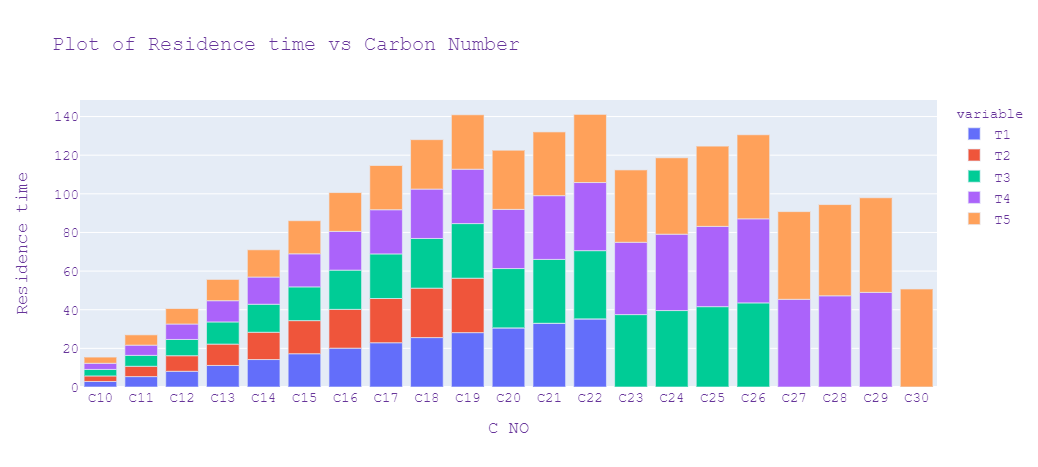

In [43]:
fig = px.bar(doil, x="C NO", y=["T1","T2","T3","T4","T5"], 
              labels={"value": "Residence time"}, title="Plot of Residence time vs Carbon Number")

fig.update_layout(
    
    font=dict(
        family="Courier New, monospace",
        size=14,
        color="RebeccaPurple")
    )
fig.show()

### This is exorbitant. Wow!

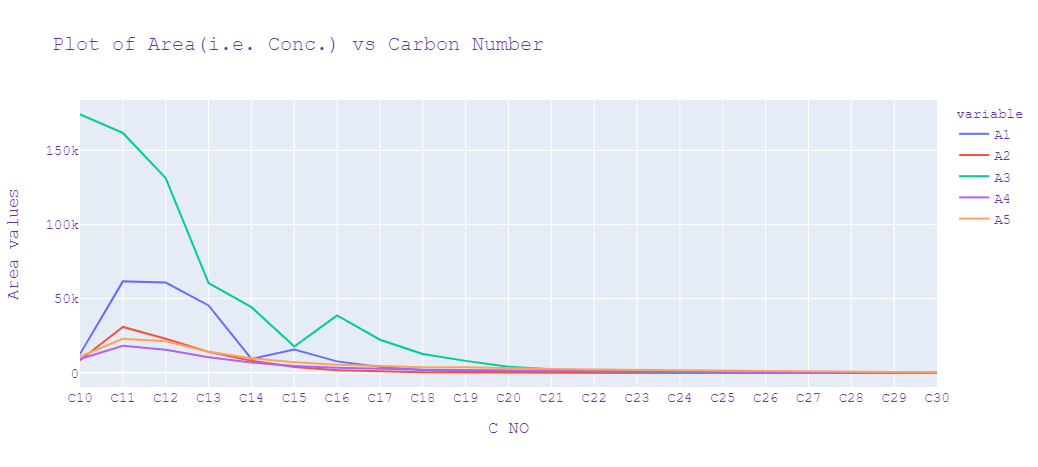

In [44]:
fig = px.line(doil, x="C NO", y=["A1","A2","A3","A4","A5"], 
                 labels={"value": "Area values"}, title="Plot of Area(i.e. Conc.) vs Carbon Number")

fig.update_layout(
    
    font=dict(
        family="Courier New, monospace",
        size=14,
        color="RebeccaPurple"
    )
)
fig.show()

### This is brilliant..

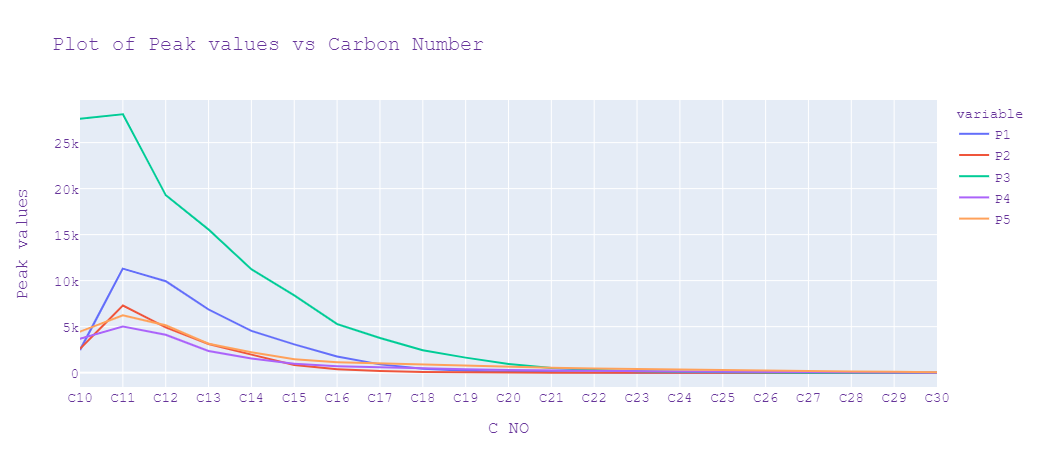

In [45]:
fig = px.line(doil, x="C NO", y=["P1","P2","P3","P4","P5"],
                 labels={"value": "Peak values"}, title="Plot of Peak values vs Carbon Number")

fig.update_layout(
    
    font=dict(
        family="Courier New, monospace",
        size=14,
        color="RebeccaPurple")
    )

fig.show()

#### Now I will experiment with a new measure, the Mean Ratio of the Area and the Peak of a carbon number across all the five samples.

In [104]:
doil = doil.fillna(0)   # filling NaN values with 0

In [105]:
doil["Mean Ratio"] = (doil["R1"]+doil["R2"]+doil["R3"]+doil["R4"]+doil["R5"])/5  # creating a new column and calculating the mean

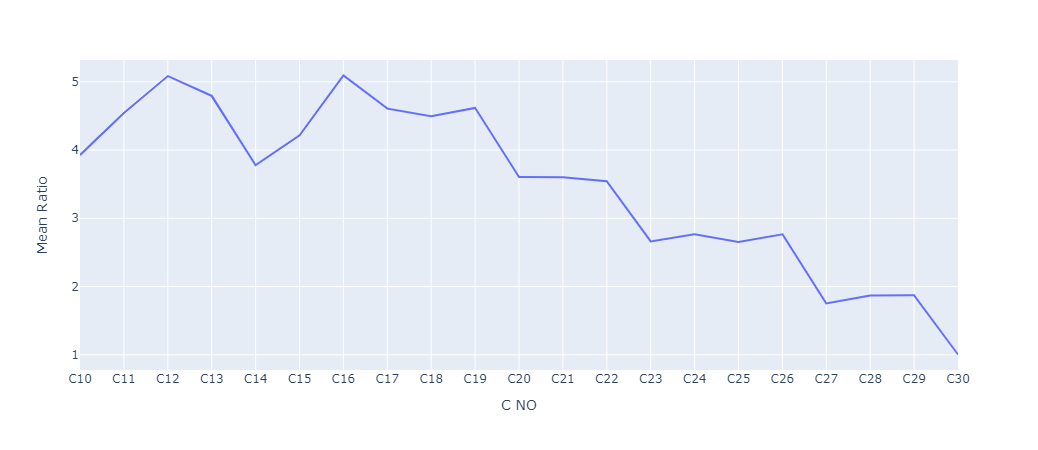

In [103]:
fig = px.line(doil, x= "C NO", y = "Mean Ratio")
fig.show()

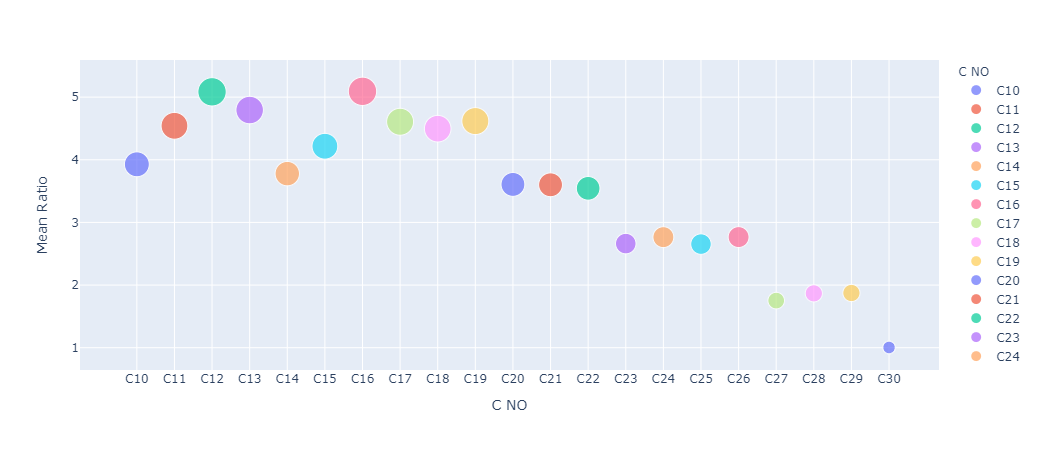

In [110]:
fig = px.scatter(doil, x= "C NO", y = "Mean Ratio",color="C NO", size="Mean Ratio" )
fig.show()

In [108]:
## Some stats of the Mean ratio column

doil["Mean Ratio"].describe()

count    21.000000
mean      3.487964
std       1.207478
min       1.003642
25%       2.661672
50%       3.606409
75%       4.541959
max       5.092582
Name: Mean Ratio, dtype: float64

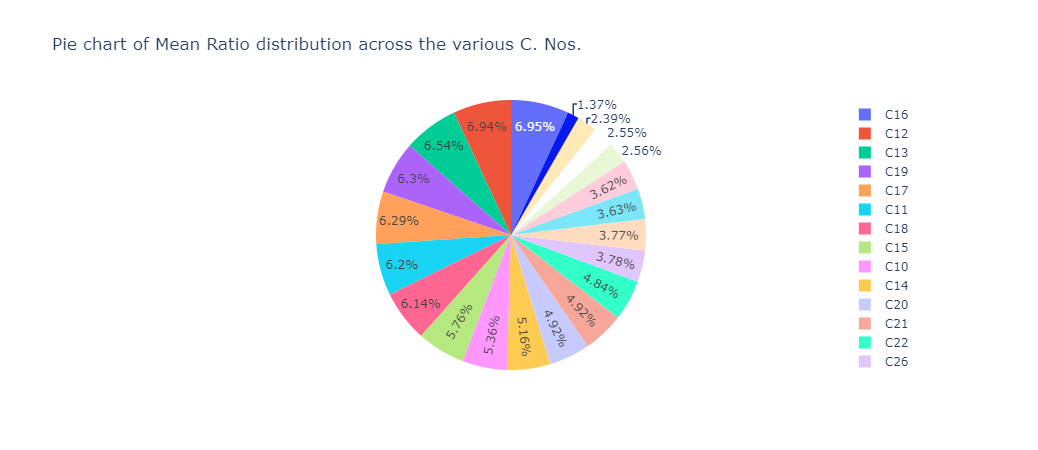

In [107]:
fig = px.pie(doil, values="Mean Ratio", names="C NO", title="Pie chart of Mean Ratio distribution across the various C. Nos.")
fig.show()

## That's it for Distilled Oil, since the size of the data is not big enough. I have got a few insights from the data and it was wonderful to do the coding and see the plots and infer conclusions from them...